<a href="https://colab.research.google.com/github/Joearrowsmith/Algothon_2019_Workshops/blob/master/Introduction_to_Financial_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://2019.algothon.org/img/icon.png" width="200">

# Algothon 2019 - Introduction to Financial Machine Learning

## Topics that will be covered in this workshop:

### Intro to Quant Finance:

- What is a financial time series?
- What is a momentum strategy?
- Random walk / Non-Random walk?
- Key Metrics
- Normalisation 
- Managing Risk

### Intro to ML:

- How do we optimise?
- What types of models are there?
- How do we split our data?


---



## What is a financial time series?



In [0]:
!pip install quandl

In [0]:
import quandl
quandl.ApiConfig.api_key = "51zhMtVAyF2VgGsWqxzD" # keep this private

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

figsize = (12,4)

In [0]:
tickers = ['EOD/BLK', 'EOD/ZNH', 'EOD/VTV', 'EOD/TCPC', 'EOD/SMPL', 'EOD/SMLF']

In [0]:
start = '2016-10-11'
end = '2019-10-11'

data = quandl.get('EOD/BLK', start_date=start, end_date=end)
close = data['Close']

In [0]:
slow_period = 90
fast_period = 45

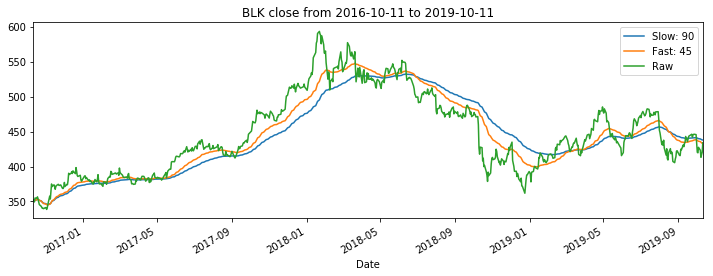

In [0]:
slow_close = close.ewm(span=slow_period).mean()
fast_close = close.ewm(span=fast_period).mean()

plt.figure(figsize=figsize)
plt.title(f'BLK close from {start} to {end}')
slow_close.plot(label=f'Slow: {slow_period}')
fast_close.plot(label=f'Fast: {fast_period}')
close.plot(label='Raw')
plt.legend()

In [0]:
diff = fast_close - slow_close

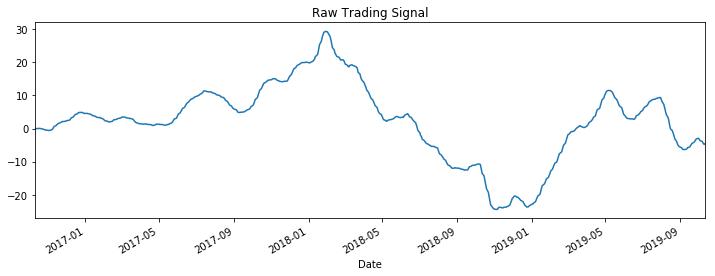

In [0]:
plt.figure(figsize=figsize)
plt.title('Raw Trading Signal')
diff.plot(label='raw signal')

In [0]:
exp_diff = np.sqrt(np.square(diff).ewm(span=60).mean())
normed_diff = diff / exp_diff

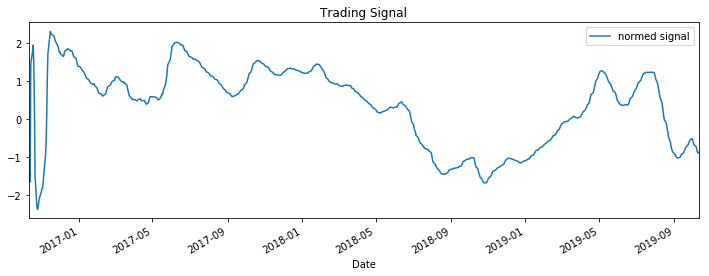

In [0]:
plt.figure(figsize=figsize)
plt.title('Trading Signal')
normed_diff.plot(label='normed signal')
plt.legend()

In [0]:
def get_trade_signal(close, slow, fast):
  ## get slow and fast means
  slow_close = close.ewm(span=slow, min_periods=fast+1).mean()
  fast_close = close.ewm(span=fast, min_periods=fast+1).mean()
  
  ## calculate signal
  diff = fast_close - slow_close 
  
  ## normalise signal by rms
  rms = np.sqrt(np.square(diff).ewm(span=60).mean())
  normed_diff = diff / rms
  return normed_diff

In [0]:
fasts = [5, 30, 90]
slows = [15, 90, 150]
warm_up_period = 252
signals = None

In [0]:
for slow, fast in zip(slows, fasts):
  signal = get_trade_signal(close, slow, fast)
  if signals is None:
    signals = pd.DataFrame(data = {f'{slow},{fast}' : signal})
  else:
    signals[f'{slow},{fast}'] = signal
    
macd_signal = signals.mean(axis=1)

No handles with labels found to put in legend.


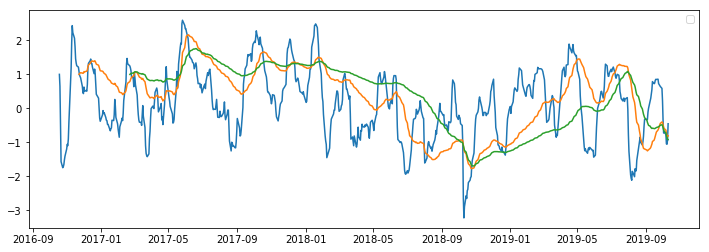

In [0]:
plt.figure(figsize=figsize)
plt.plot(signals)
plt.legend()

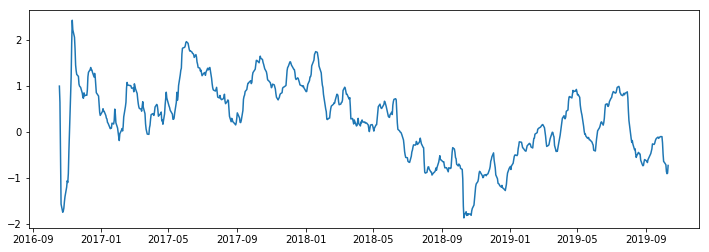

In [0]:
plt.figure(figsize=figsize)
plt.plot(macd_signal)

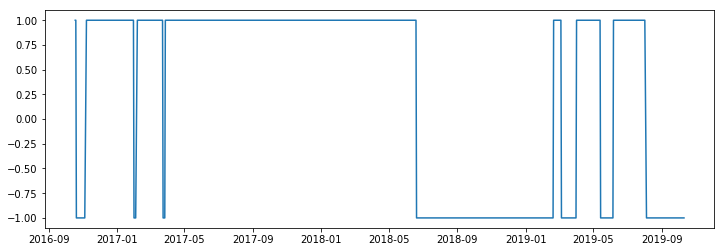

In [0]:
abs_macd = macd_signal
abs_macd[abs_macd > 0] = 1
abs_macd[abs_macd < 0] = -1

plt.figure(figsize=figsize)
plt.plot(abs_macd)

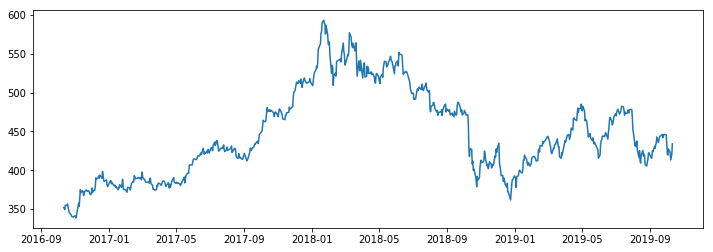

In [0]:
plt.figure(figsize=figsize)
plt.plot(close)